# La Gradient Boosting Tree avec Python

Dans ce notebook, nous allons expliquer tous les hyperparamètres présent dans la fonction Gradient Boosting Tree de sklearn. Le but étant de vous familliariser avec ses paramètres afin que vous puissiez entraîner le meilleurs modèles possibles. 

Vous pouvez retrouver [ici](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) la documentation de la fonction Gradient Boosting Tree de sklearn.

# Importation des packages

In [ ]:
# Packages de gestion des données
import numpy as np
import pandas as pd

# Packages de visualisation
import matplotlib.pyplot as plt

# Packages de modélisation
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV

from sklearn import tree
import graphviz 

# Création des données

In [ ]:
# x est une variable continue de 0 à 100
x = np.arange(0,100)
x = pd.DataFrame({'x':x})

# y aura cinq distributions de données différentes
y1 = np.random.uniform(5,20,20)
y2 = np.random.uniform(30,40,20)
y3 = np.random.uniform(-20,0,20)
y4 = np.random.uniform(45,55,20)
y5 = np.random.uniform(10,20,20)

# Intégration de la variable cible dans la base de données
x['y'] = np.concatenate((y1,y2,y3,y4,y5))

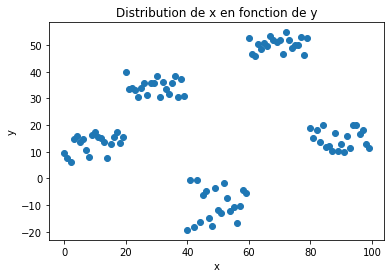

In [ ]:
plt.scatter(x['x'], x['y'])
plt.ylabel('y')
plt.xlabel('x')
plt.title('Distribution de x en fonction de y')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x['x'], x['y'], test_size=0.33, random_state=123)

x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

# Les hyperparamètres

Les hyperparamères, sont les paramètres que vous choisissez à l'initialisation de l'algorithme d'apprentissage et qui influeront sur l'entraînement du modèle.

## Hyperparamètres du Gadient Boosting Tree

### loss

La loss est la fonction que l'algorithme utilisera pour optimiser la forêt d'arbre. C'est cette fonction qui sera utiliser pour le calcul des résidus. 

In [ ]:
# Identification des paramètres
parameters = {'loss':('ls', 'lad', 'huber', 'quantile')}

# Initialisation du modèle
gbt = GradientBoostingRegressor()

# Gridsearch
grid = GridSearchCV(gbt, parameters)

# Entraînement
grid.fit(x_train, y_train)

# résultats
grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='lad', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### alpha

Cette hyperpparamètre n'est utile que lorsque vous utilisez l'hyperparamètre 'huber' ou 'quantile'. 

La valeur de alpha doit rester enre 0 et 1.

In [ ]:
# Identification des paramètres
parameters = {'loss':('huber', 'quantile'), 
              'alpha':np.arange(0.1, 1, 0.1)}

# Initialisation du modèle
gbt = GradientBoostingRegressor()

# Gridsearch
grid = GridSearchCV(gbt, parameters)

# Entraînement
grid.fit(x_train, y_train)

# résultats
grid.best_estimator_

GradientBoostingRegressor(alpha=0.6, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='quantile',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### learning_rate

Cette hyperparamètre va contrôler l'apport de chaque arbre dans la forêt.

1.1649056512111717e-15


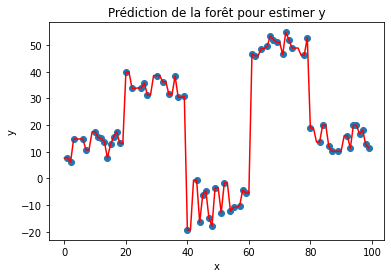

In [ ]:
# Initialisation du modèle
gbt = GradientBoostingRegressor(learning_rate=1)

# Entraînement
gbt.fit(x_train, y_train)

# Prédiction des données d'entraînement
y_train_pred = gbt.predict(x_train)

print(mean_absolute_error(y_train_pred, y_train))

# Visualisation du modèle actuel
x_line = np.arange(0,100).reshape(-1, 1)
plt.scatter(x_train, y_train)
pred = gbt.predict(x_line)
plt.plot(x_line, pred, color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Prédiction de la forêt pour estimer y')
plt.show()

6.427912773098188


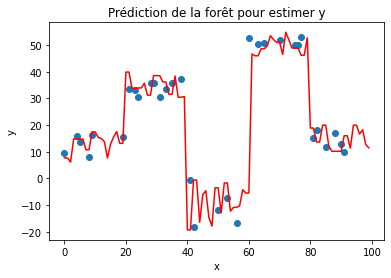

In [ ]:
# Prédiction des données de tests
y_test_pred = gbt.predict(x_test)

print(mean_absolute_error(y_test_pred, y_test))

# Visualisation du modèle actuel
x_line = np.arange(0,100).reshape(-1, 1)
plt.scatter(x_test, y_test)
pred = gbt.predict(x_line)
plt.plot(x_line, pred, color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Prédiction de la forêt pour estimer y')
plt.show()

2.337475962322703


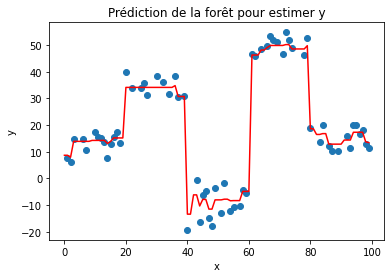

In [ ]:
# Initialisation du modèle
gbt = GradientBoostingRegressor(learning_rate=0.04)

# Entraînement
gbt.fit(x_train, y_train)

# Prédiction des données d'entraînement
y_train_pred = gbt.predict(x_train)

print(mean_absolute_error(y_train_pred, y_train))

# Visualisation du modèle actuel
x_line = np.arange(0,100).reshape(-1, 1)
plt.scatter(x_train, y_train)
pred = gbt.predict(x_line)
plt.plot(x_line, pred, color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Prédiction de la forêt pour estimer y')
plt.show()

4.916231828808045


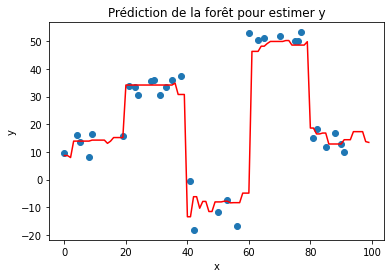

In [ ]:
# Prédiction des données de tests
y_test_pred = gbt.predict(x_test)

print(mean_absolute_error(y_test_pred, y_test))

# Visualisation du modèle actuel
x_line = np.arange(0,100).reshape(-1, 1)
plt.scatter(x_test, y_test)
pred = gbt.predict(x_line)
plt.plot(x_line, pred, color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Prédiction de la forêt pour estimer y')
plt.show()

In [ ]:
# Identification des paramètres
parameters = {'learning_rate':np.arange(0.1, 1, 0.1)}

# Initialisation du modèle
gbt = GradientBoostingRegressor()

# Gridsearch
grid = GridSearchCV(gbt, parameters)

# Entraînement
grid.fit(x_train, y_train)

# résultats
grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Identification des paramètres
parameters = {'learning_rate':np.arange(0.01, 0.2, 0.01)}

# Initialisation du modèle
gbt = GradientBoostingRegressor()

# Gridsearch
grid = GridSearchCV(gbt, parameters)

# Entraînement
grid.fit(x_train, y_train)

# résultats
grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.03, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Identification des paramètres
parameters = {'learning_rate':np.arange(0.02, 0.04, 0.001)}

# Initialisation du modèle
gbt = GradientBoostingRegressor()

# Gridsearch
grid = GridSearchCV(gbt, parameters)

# Entraînement
grid.fit(x_train, y_train)

# résultats
grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.03700000000000002,
                          loss='ls', max_depth=3, max_features=None,
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          presort='deprecated', random_state=None,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

### n_estimators

Ce paramètre détermine le nombre d'arbre de notre forêt.

### subsample

Détermine la proportion de notre dataset utilisé lors de la création des arbres de la forêt. 

1.2415617336677338


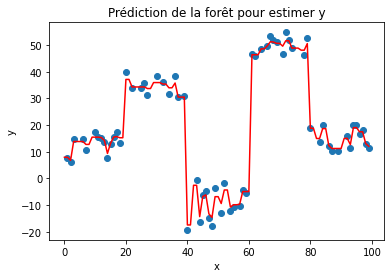

In [ ]:
# Initialisation du modèle
gbt = GradientBoostingRegressor(subsample=1)

# Entraînement
gbt.fit(x_train, y_train)

# Prédiction des données d'entraînement
y_train_pred = gbt.predict(x_train)

print(mean_absolute_error(y_train_pred, y_train))

# Visualisation du modèle actuel
x_line = np.arange(0,100).reshape(-1, 1)
plt.scatter(x_train, y_train)
pred = gbt.predict(x_line)
plt.plot(x_line, pred, color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Prédiction de la forêt pour estimer y')
plt.show()

5.504714633831664


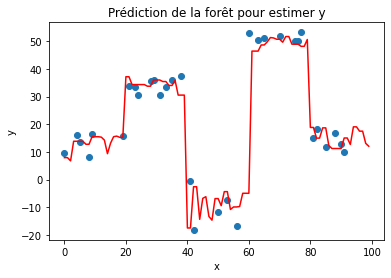

In [ ]:
# Prédiction des données de tests
y_test_pred = gbt.predict(x_test)

print(mean_absolute_error(y_test_pred, y_test))

# Visualisation du modèle actuel
x_line = np.arange(0,100).reshape(-1, 1)
plt.scatter(x_test, y_test)
pred = gbt.predict(x_line)
plt.plot(x_line, pred, color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Prédiction de la forêt pour estimer y')
plt.show()

1.5168748395651452


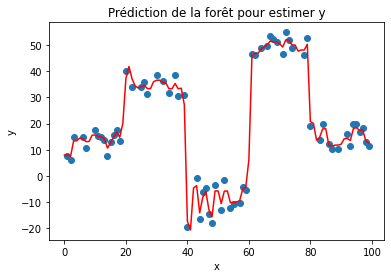

In [ ]:
# Initialisation du modèle
gbt = GradientBoostingRegressor(subsample=0.7)

# Entraînement
gbt.fit(x_train, y_train)

# Prédiction des données d'entraînement
y_train_pred = gbt.predict(x_train)

print(mean_absolute_error(y_train_pred, y_train))

# Visualisation du modèle actuel
x_line = np.arange(0,100).reshape(-1, 1)
plt.scatter(x_train, y_train)
pred = gbt.predict(x_line)
plt.plot(x_line, pred, color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Prédiction de la forêt pour estimer y')
plt.show()

5.411887795843137


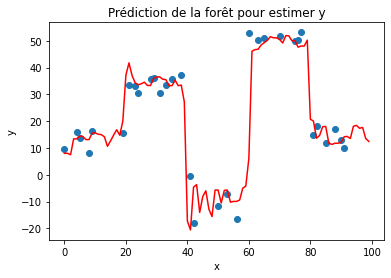

In [ ]:
# Prédiction des données de tests
y_test_pred = gbt.predict(x_test)

print(mean_absolute_error(y_test_pred, y_test))

# Visualisation du modèle actuel
x_line = np.arange(0,100).reshape(-1, 1)
plt.scatter(x_test, y_test)
pred = gbt.predict(x_line)
plt.plot(x_line, pred, color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Prédiction de la forêt pour estimer y')
plt.show()

11.697756253237097


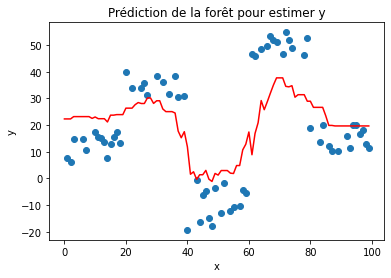

In [ ]:
# Initialisation du modèle
gbt = GradientBoostingRegressor(subsample=0.03)

# Entraînement
gbt.fit(x_train, y_train)

# Prédiction des données d'entraînement
y_train_pred = gbt.predict(x_train)

print(mean_absolute_error(y_train_pred, y_train))

# Visualisation du modèle actuel
x_line = np.arange(0,100).reshape(-1, 1)
plt.scatter(x_train, y_train)
pred = gbt.predict(x_line)
plt.plot(x_line, pred, color='red')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Prédiction de la forêt pour estimer y')
plt.show()

### init

Cette valeur détermine l'initialisation du modèle, pour le calcul des résidus avant la création du première arbre. 

### verbose



Cette valeur détermine la quantité d'informations reçut pendant l'entraînement du modèle. 

In [ ]:
# Initialisation du modèle
gbt = GradientBoostingRegressor(verbose=0)

# Entraînement
gbt.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Initialisation du modèle
gbt = GradientBoostingRegressor(verbose=1)

# Entraînement
gbt.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1         353.1898            0.07s
         2         288.7597            0.07s
         3         236.5598            0.07s
         4         194.2694            0.07s
         5         160.0013            0.11s
         6         132.2246            0.14s
         7         109.7037            0.13s
         8          91.4464            0.12s
         9          76.6400            0.11s
        10          64.6273            0.11s
        20          18.5014            0.06s
        30          10.6313            0.04s
        40           8.7436            0.03s
        50           7.5238            0.02s
        60           6.1122            0.02s
        70           4.6590            0.01s
        80           3.7382            0.01s
        90           3.0799            0.00s
       100           2.4786            0.00s


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)

In [ ]:
# Initialisation du modèle
gbt = GradientBoostingRegressor(verbose=2)

# Entraînement
gbt.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1         353.1898            0.09s
         2         288.7597            0.17s
         3         236.5598            0.20s
         4         194.2694            0.18s
         5         160.0013            0.17s
         6         132.2246            0.15s
         7         109.7037            0.15s
         8          91.4464            0.13s
         9          76.6400            0.13s
        10          64.6273            0.12s
        11          54.8844            0.11s
        12          46.9731            0.11s
        13          40.5523            0.10s
        14          35.3340            0.10s
        15          31.0772            0.10s
        16          27.5728            0.09s
        17          24.6709            0.09s
        18          22.2087            0.09s
        19          20.2071            0.09s
        20          18.5014            0.08s
        21          17.0121            0.08s
        2

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=2, warm_start=False)

### warm_start

Booléen qui permet d'entraîner de nouveaux arbres dans un forêt existante. 

In [ ]:
# Initialisation du modèle
gbt = GradientBoostingRegressor(n_estimators=2, warm_start=False)

# Entraînement
gbt.fit(x_train, y_train)

gbt.estimators_

array([[DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x7FC489C49050,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x7FC489C49050,
                      splitter='best')]], dtype=object)

In [ ]:
gbt.n_estimators +=2

# Entraînement
gbt.fit(x_train, y_train)

gbt.estimators_

array([[DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x7FC489C49050,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x7FC489C49050,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion

In [ ]:
# Initialisation du modèle
gbt = GradientBoostingRegressor(n_estimators=2, warm_start=True)

# Entraînement
gbt.fit(x_train, y_train)

gbt.estimators_

array([[DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x7FC489C49050,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x7FC489C49050,
                      splitter='best')]], dtype=object)

In [ ]:
gbt.n_estimators +=2

# Entraînement
gbt.fit(x_train, y_train)

gbt.estimators_

array([[DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x7FC489C49050,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x7FC489C49050,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion

### random_state

Ce paramètre permet d'initialiser une seed. C'est-à-dire que les nombres générés aléatoirement seront toujours les mêmes. C'est intéressant à utiliser durant les tests où l'on voudra tomber sur les mêmes résultats et être sûr que les changements de performance sont dû au changement des paramètres et non à une initialisation différente.

### n_iter_no_change

La valeur de cet hyperparamètre et le nombre d'itérations sans baisse de la performance pour arrêté l'entraînement du modèle. 

### validation_fraction

Fraction du jeu de données séparé du jeu d'entraînement pour évaluer la forêt dans le cas de l'utilisation de n_iter_no_change.

### tol

Fixe la valeur à partir de laquelle une augmentation de performance est significative. 

## Hyperparamètre des arbres de la forêt

### criterion

Le paramètre *criterion* est la fonction de coût, c'est-à-dire le critère de performance que l'on choisit pour construire notre modèle et mesurer sa qualité. 

On a le choix entre trois options : le mse, le friedman_mse et le mae.

### min_samples_split

Le min sample split est le nombre minimal d'exemples que le modèle doit avoir pour pouvoir faire une nouvelle séparation. 

Vous avez le choix de remplir ce paramètre avec un entier (int) ou un flottant (float). 

Si vous utilisez un entier, le modèle le comprendra comme le nombre minimal d'exemples que le noeud doit avoir pour pouvoir créer une nouvelle séparation. 

Si vous utiliser un flottant, le modèle le comprendra comme la fraction de données que le noeud doit avoir pour pouvoir créer une nouvelle séparation.

Plus ce paramètre sera grand plus votre arbre sera simple et plus il sera généralisable.

### min_samples_leaf

Le min_sample_leaf est le minimum d'exemples requis pour créer une feuille.

Seules les feuilles ayant ce minimum d'exemples seront conservées. Pour ce paramètre aussi vous pouvez spécifier un nombre entier ou un nombre flottant.

Plus ce paramètre sera bas, plus votre modèle pourra faire du cas par cas et aura du mal à généraliser.

Plus ce paramètre est petit, plus le modèle sera performant sur le jeu d'entraînement, mais plus vous dégraderez les performances sur le jeu de test. 

Plus ce paramètre est élevé, plus le modèle sera simple et généralisable. Cette meilleure généralisation augmentera les performances du modèle sur le jeu de test.

Attention, si vous augmentez trop ce paramètre, vous dégraderez aussi les performances global du modèle. Tester plusieurs valeurs afin de maximiser vos performances sur votre jeu de tests.

### min_weight_fraction_leaf

Dans l'entraînement d'un modèle d'arbre de décision, on peut ajouter un vecteur de poids qui donne une importance différente aux observations de notre jeu de données.

Si vous avez donné un vecteur de poids avec votre jeu de données, ce paramètre vous permet de spécifier le minimum de poids de votre feuille pour sa création. Si vous n'avez pas ajouté de vecteur de poids pour l'entraînement de votre modèle, ce paramètre a la même utilité que le paramètre min_sample_leaf.

Pour ce paramètre aussi vous pouvez spécifier un nombre entier ou un nombre flottant.

### max_depth

La profondeur de l'arbre est un des paramètres les plus important à définir. 

Ce paramètre va déterminer la longueur maximum de votre arbre. Vous pouvez aussi spécifier None pour ce paramètre, dans ce cas durant l'entraînement l'arbre va s'approfondir jusqu'à obtenir les feuilles les plus pures possible. 

Je ne vous conseille pas de laisser ce paramètre à *None*, car plus votre arbre sera profond plus il sera complexe et plus il souffrira du sur-entraînement.



Plus l'arbre est profond, plus il sera performant sur le jeu d'entraînement, mais plus vous dégraderez les performances sur le jeu de test. 

Plus la profondeur est réduite, plus le modèle sera simple et généralisable. Cette meilleure généralisation augmentera les performances du modèle sur le jeu de test.

Attention, si vous réduisez trop la profondeur de l'arbre, vous dégraderez aussi les performances global du modèle. Tester plusieurs profondeurs afin de maximiser vos performances sur votre jeu de tests.

### min_impurity_decrease

Ce paramètre permet de contrôler si le gain de pureté est suffisant pour continuer la construction de l'arbre dans cette voie. 

Ce paramètre peut être intéressant, car il est possible d'avoir des règles supplémentaires qui complexifie le modèle pour ne faire gagner que peu de pureté.

Plus la valeur de ce paramètre est bas plus l'arbre sera complexe et moins il sera généralisable.

Plus la valeur de ce paramètre est élevée plus l'arbre sera simple et généralisable. 

### min_impurity_split

Ce paramètre n'est plus maintenu ne l'utilisait pas préférez utiliser min_impurity_decrease.

### max_features

Le paramètre max_features contrôle le nombre de variables à tester pour trouver la meilleure séparation.

Vous pouvez indiquer un entier qui déterminera le nombre de variables à tester.

Vous pouvez indiquer un flottant qui sera la proportion de variables à tester parmi les variables du jeu de données.

Il y a une option auto qui effectue un test pour chaque variable de votre jeu de données, cette option est équivalente à choisir None. 

Il y a une option sqrt qui teste la racine carré du nombre de variables du jeu de données.

Il y a une option log2 qui teste le log2 du nombre de variables de votre jeu de données.

À noter que même si vous spécifiez un maximum de variable à tester l'algorithme peut le dépasser dans le cas où il ne trouve pas de variable valide pour séparer le jeu de données dans le nombre de tests imparti. 


C'est un paramètre à tuner si vous avez des problèmes de performance et que vous voulez réduire le temps de calcul. Si vous n'avez pas de problème de performance, je vous recommande de laisser None ou auto.

### max_leaf_nodes

Ce paramètre vous permet de choisir le nombre maximum de feuilles de votre arbre, il peut être intéressant de fixer ce nombre pour contrôler la complexité de l'arbre. Il garde bien sûr les meilleures feuilles disponibles.

Plus ce paramètre est grand, plus le modèle sera performant sur le jeu d'entraînement, mais plus vous dégraderez les performances sur le jeu de test. 

Plus ce paramètre sera petit, plus le modèle sera simple et généralisable. Cette meilleure généralisation augmentera les performances du modèle sur le jeu de test.

Attention, si vous réduisez trop ce paramètre, vous dégraderez aussi les performances global du modèle. Tester plusieurs valeurs afin de maximiser vos performances sur votre jeu de tests.

### ccp_alpha

Ce paramètre initialise le *alpha* de l'algorithme du minimal Cost-Complexity Pruning (CCP).

Le CCP est un algorithme qui permet de supprimer des parties de l'arbre qui ajoute de la complexité au modèle sans apporter beaucoup de valeur supplémentaire. Le but de cette suppression est de rendre l'algorithme plus simple et plus généralisable tout en conservant une performance acceptable.

Le paramètre alpha est un nombre positif. Plus le paramètre est élevé plus le modèle sera simplifié. 

Attention si *alpha* est trop élevé votre modèle deviendra trop simple et cela dégradera la performance de votre modèle. 

# Attributs

Les attributs sont les différentes informations que l'on peut obtenir du modèle une fois qu'il est entraîné.

## features_importances

Permet de visualiser lesquelles de vos variables sont les plus influentes dans votre modèle. 

In [ ]:
gbt.feature_importances_

array([1.])

## oob_improvement

Seulement disponible si sub_sample est présent. 

Cet attribut calcul la progresion de l'erreur du modèle sur le jeu de données gardé pour le test.

In [ ]:
# Initialisation du modèle
gbt = GradientBoostingRegressor(subsample=0.1)

# Entraînement
gbt.fit(x_train, y_train)

gbt.oob_improvement_

array([ 16.38739238,  58.61859904,  28.46926619,   9.31831776,
        43.26600233,  25.40376277,   4.44436625,   1.69394692,
       -17.54444937,   0.20735683,  20.55893591,  22.90516124,
         2.08012178,  18.56043833,   9.51965549,   2.59096298,
        -1.34446153,   5.10091904,   1.41927218,   7.80948421,
         4.35989941,   1.28750474,   0.6750682 ,   1.02004235,
        -2.68429611,   5.43715441,   1.19103484,   4.21918313,
        -5.65679743,  -0.20575999,   3.19166386,  -4.66374459,
         3.84036983,   0.96777493,   1.8371787 ,   4.86307559,
        -0.57658432,   1.09921126,  -0.49785886,   0.64502552,
        -6.22346289,  -0.66488444,  -4.53045745,  -1.78506284,
         0.13272423,   0.5347285 ,   0.65311796,  -2.19790184,
         1.51020812,  -0.70280971,  -0.91499888,  -1.23538673,
        -5.42272584,  -0.71885054,  -0.661725  ,   0.15903414,
        -0.61045589,  -1.70508556,  -0.37014869,  -1.1342509 ,
         0.25378221,  -2.27632205,  -1.26449453,  -0.75

## train_score

L'attribut train_score est le calcul de l'erreur du modèle sur les données utilisées pour l'entraînement des modèles tout au long de la création de la forêt. 

In [ ]:
gbt.train_score_

array([353.1898141 , 288.75965426, 236.55976251, 194.26944252])

## loss

In [ ]:
gbt.loss_

## estimators

L'attribut renvoie une liste des tous les modèles d'arbres de la forêt.

In [ ]:
gbt.estimators_

array([[DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x7FC489C49050,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x7FC489C49050,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion

## n_classes

Nombre de classes du modèle, pour la régression c'est toujours à 1, l'attribut sera bientôt supprimé. 

## n_estimators

Renvoie le nombre d'arbres de la forêt.

In [ ]:
gbt.n_estimators_

100

## n_features

Nombre de variables pendant l'entraînement du modèle. 

In [ ]:
gbt.n_features_

1

## max_features

Retourne la valeur de max_features établit lors de l'initialisation du modèle. 

In [ ]:
gbt.max_features_

1